

# Project: Investigate a Dataset noshow appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. 

> the data has alot of variables that will let us know about the effects that help the people show up for the medical appointment or not

> the questions are what are the factors which have an effect on people to show up the appointment ? <br>
1 - how does gender affect the show up ? <br>
2 - how does scholarship affect the show up ? <br>
3 - how does handicap affect the show up ? <br>
4 - how does smsreceived affect the show up ? <br>
5 - how does Age affect the show up ? <br>

In [16]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# the shape of the dataframe 
df.shape

(110527, 14)

In [19]:
#statitics for data as general
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Age mean is almost 37 ,
> age max is 115
  

In [20]:
#check for duplicates 
df.duplicated().sum()

0

> there are no duplicated raws in this data set

In [21]:
#explore the data , its types and if there are null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

In [22]:
# we will drop the columns which we will not use in our analysis as IDs and days
df.drop(['PatientId','ScheduledDay','AppointmentID','AppointmentID','AppointmentDay'], axis = 1 ,inplace = True)

In [23]:
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [24]:
#make all columns as lower case 
df.rename(columns = lambda x : x.replace('-',"").replace("_","").lower(),inplace = True)
df.head(3)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [25]:
#check for any null values 
df.isnull().any()

gender           False
age              False
neighbourhood    False
scholarship      False
hipertension     False
diabetes         False
alcoholism       False
handcap          False
smsreceived      False
noshow           False
dtype: bool

#### there is no null values in the dataset

<a id='eda'></a>
## Exploratory Data Analysis

### looking at the data from general view


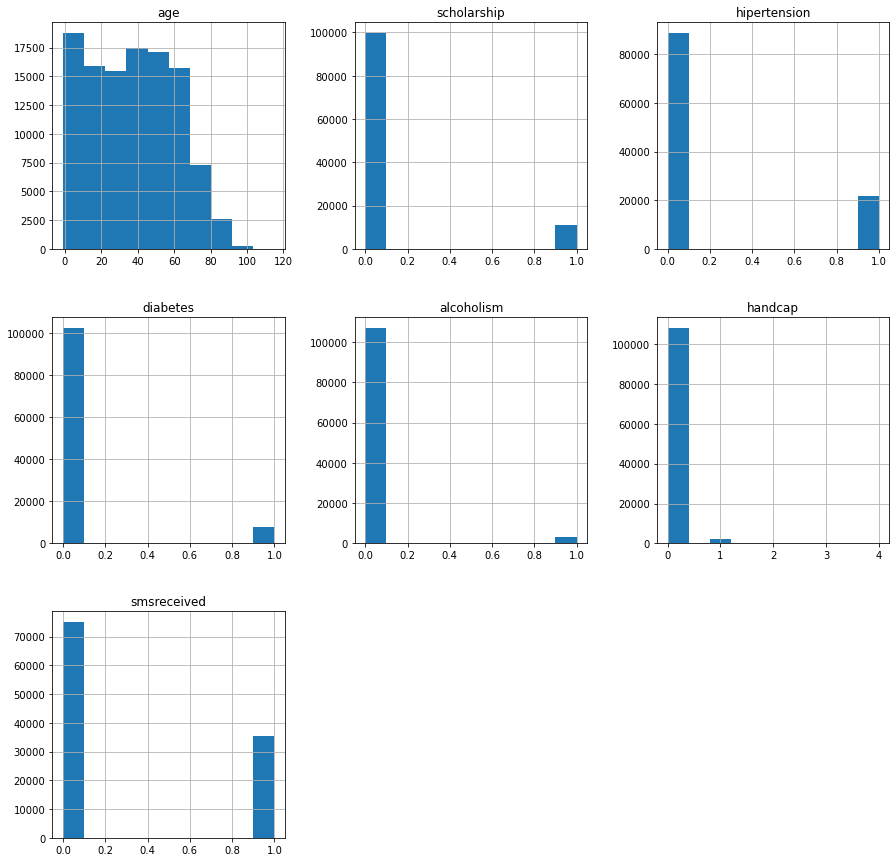

In [26]:
df.hist(figsize=(15,15));

## general notes from histograms 
> the most people does not have scholarship

> it is small ratio which is alcoholism


### what are the factors which have an effect on people to show up the appointment ?

In [27]:
# assign values to find comparsions between various variables
df['show'] = df['noshow'] == 'No'
df['notshow'] = df['noshow'] == 'Yes'

In [45]:
show= df['noshow'] == 'No'
notshow = df['noshow'] == 'Yes'

In [28]:
#return the sum of sepecific columns
def sumfunc(x):
    return x.sum()

In [29]:
print(sumfunc(df.show),sumfunc(df.notshow))

88208 22319


#### the people who showed up are more than who did not

# Analyzing data with visualization 


### 1 - how does gender affect the show up ? 

## For gender 

In [30]:
print("the number of shows up for both genders {}".format(df.groupby('gender').show.sum()))
print("the number of non-shows up for both genders {}".format(df.groupby('gender').notshow.sum()))

the number of shows up for both genders gender
F    57246
M    30962
Name: show, dtype: int64
the number of non-shows up for both genders gender
F    14594
M     7725
Name: notshow, dtype: int64


### plotting for the gender 

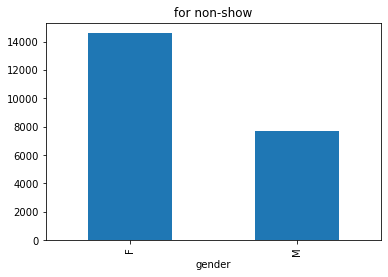

In [31]:
df.groupby('gender').notshow.sum().plot(kind = 'bar',title = "for non-show");

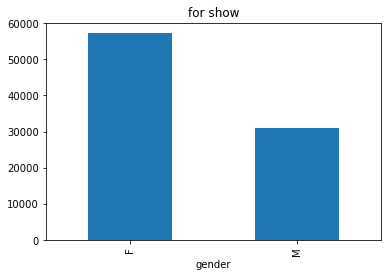

In [32]:
df.groupby('gender').show.sum().plot(kind = 'bar',title = "for show");

#### this plotting shows that the females are going for the appoinments more than the men

### 2 - how does scholarship affect the show up ? 

## for scholarship

In [33]:
print("the number of shows up for who has scholarship {}".format(df.groupby('scholarship').show.sum()))


the number of shows up for who has scholarship scholarship
0    79925
1     8283
Name: show, dtype: int64


In [34]:
print("the number of non-shows up for who has scholarship {}".format(df.groupby('scholarship').notshow.sum()))

the number of non-shows up for who has scholarship scholarship
0    19741
1     2578
Name: notshow, dtype: int64


 ## plotting for the scholarship

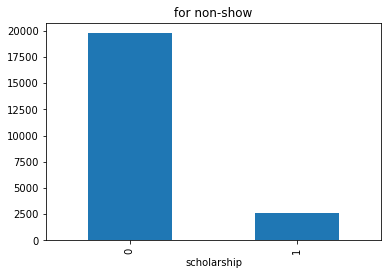

In [35]:
df.groupby('scholarship').notshow.sum().plot(kind = 'bar',title = "for non-show");

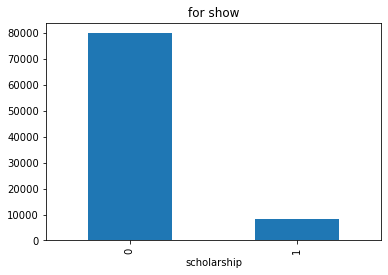

In [54]:
df.groupby('scholarship').show.sum().plot( kind = 'bar',title = "for show");

#### the data shows that most people who showed have no scholarship and as a small detail the people with scholarships  who did not show are more than people with scholarship and showed

### 3 - how does handicap affect the show up ? 

 ## for the handicap

In [37]:
print("the number of who showed up and are handcap {}".format(df.groupby('handcap').show.sum()))
print("the number of who did not show up and are handcap {}".format(df.groupby('handcap').notshow.sum()))

the number of who showed up and are handcap handcap
0    86374
1     1676
2      146
3       10
4        2
Name: show, dtype: int64
the number of who did not show up and are handcap handcap
0    21912
1      366
2       37
3        3
4        1
Name: notshow, dtype: int64


 ## plotting for the handicap

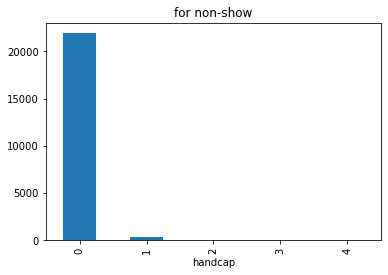

In [38]:
df.groupby('handcap').notshow.sum().plot(kind = 'bar',title = "for non-show");

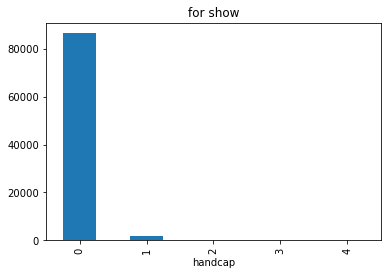

In [56]:
df.groupby('handcap').show.sum().plot(kind = 'bar',title = "for show");

#### the most people are not handcap

### 4 - how does smsreceived affect the show up ? 

 ## for the smsreceived

In [40]:
print("the number of who showed up and received sms {}".format(df.groupby('smsreceived').show.sum()))
print("the number of who did not show up and received sms {}".format(df.groupby('smsreceived').notshow.sum()))

the number of who showed up and received sms smsreceived
0    62510
1    25698
Name: show, dtype: int64
the number of who did not show up and received sms smsreceived
0    12535
1     9784
Name: notshow, dtype: int64


 ## plotting for the smsreceived

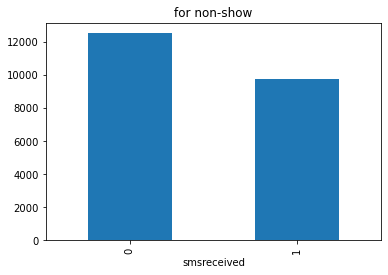

In [41]:
df.groupby('smsreceived').notshow.sum().plot(kind = 'bar',title = "for non-show");

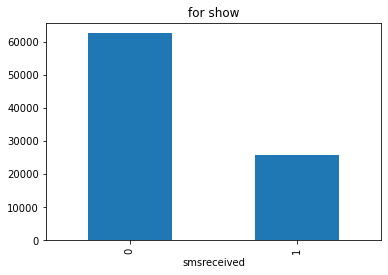

In [42]:
naem= ["asd","asd"]
df.groupby('smsreceived').show.sum().plot(kind ='bar',title = "for show" ) ;

#### this data tells us that who did not receive sms visited the doctor more

### 5 - how does Age affect the show up ? 

 ## for the Age

In [46]:
print("the average age for who showed up {} ".format(df.age[show].mean()))
print("the average age for who did not show up {} ".format(df.age[notshow].mean()))

the average age for who showed up 37.790064393252315 
the average age for who did not show up 34.31766656212196 


 ## plotting for the Age

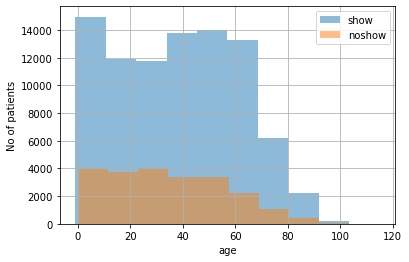

In [58]:

df.age[show].hist(alpha= 0.5)
df.age[notshow].hist(alpha = 0.5)
plt.ylabel("No of patients")
plt.xlabel("age")
plt.legend(['show','noshow']);

#### the first 10 years are the most period go for the appointment

## for the neighbourhood

the number of who showed with neighbourhoodneighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
                       ... 
SÃO JOSÉ               1549
SÃO PEDRO              1933
TABUAZEIRO             2559
UNIVERSITÁRIO           120
VILA RUBIM              710
Name: show, Length: 81, dtype: int64


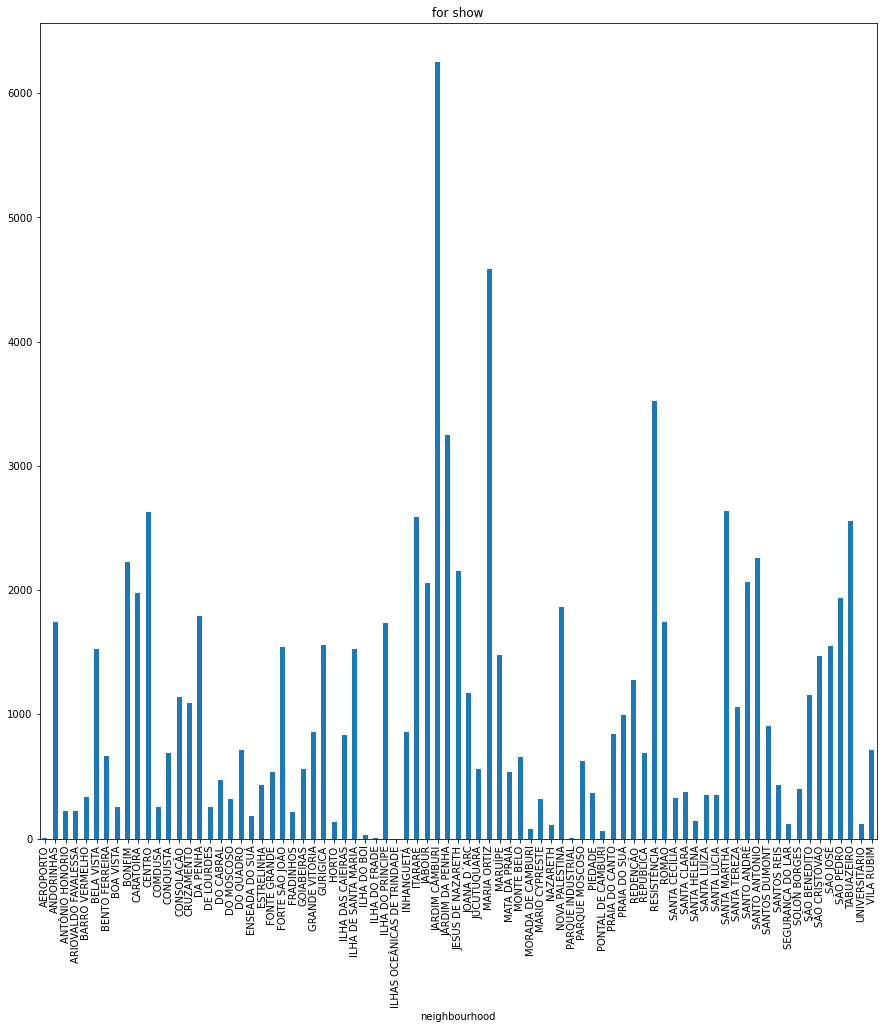

In [48]:
print("the number of who showed with neighbourhood{}".format(df.groupby('neighbourhood').show.sum()))

df.groupby('neighbourhood').show.sum().plot(kind = 'bar',title = "for show",figsize=(15,15));

the number of who did not with neighbourhoodneighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Name: notshow, Length: 81, dtype: int64


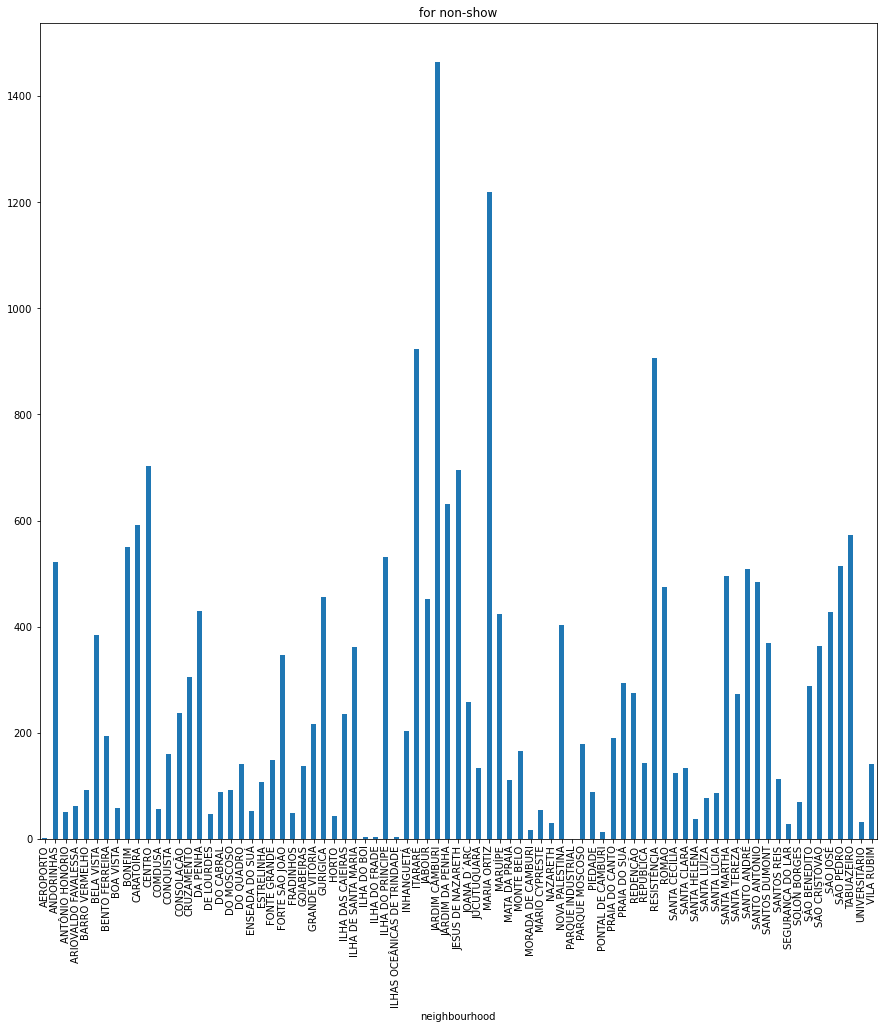

In [49]:
print("the number of who did not with neighbourhood{}".format(df.groupby('neighbourhood').notshow.sum()))

df.groupby('neighbourhood').notshow.sum().plot(kind = 'bar',title = "for non-show",figsize=(15,15));

<a id='conclusions'></a>
## Conclusions

> ### results
1.the people with scholarships are more likely to miss the appointment<br>
2 the sms messages are not important <br>
3 the first 10 years are the most period go for the appointment and when it get older it decreases<br>
4 gender and handcap does not show great differences<br>

>## limitations 
1 there are no informations about the patients home place to can compare it with the neighbourhood<br>
2 age of one patient is -1 <br>